#  HOUSE SALES PREDICTION IN KING COUNTY USING REGRESSION MODELLING

## 1: BUSINESS UNDERSTANDING

For this project, you will use regression modeling to analyze house sales in a northwestern county.

A real estate agency project that helps homeowners buy and/or sell homes. This project focuses on the need to provide advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

Analyse which factors lead to higher prices.

###  1.1 Data used

This project uses the King County House Sales dataset, which can be found in kc_house_data.csv in the data folder in this repo. The description of the column names can be found in column_names.md in the same folder. The dataset contains information about the sale of each house as well as the number of predictor variables.
                
Column Names in the csv file and their descriptions

1.	date - Date house was sold
2.	price - Sale price (prediction target)
3.	bedrooms - Number of bedrooms
4.	bathrooms - Number of bathrooms
5.	sqft_living - Square footage of living space in the home
6.	sqft_lot - Square footage of the lot
7.	floors - Number of floors (levels) in house
8.	waterfront - Whether the house is on a waterfront
9.	view - Quality of view from house
10.	condition - How good the overall condition of the house is. Related to maintenance of house
11.	grade - Overall grade of the house. Related to the construction and design of the house
12.	sqft_above - Square footage of house apart from basement
13.	sqft_basement - Square footage of the basement
14.	yr_built - Year when house was built
15.	yr_renovated - Year when house was renovated
16.	zipcode - ZIP Code used by the United States Postal Service

## 2: DATA INSPECTION

### 2.1 Importing The Necessary Libraries

In [1]:
#importing libraries and packages
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

### 2.2 Reading the kc_house_data csv file

In [2]:
# read the kc_house_data.csv file
# display the first 10 rows using .head method
king_county_df = pd.read_csv("data/kc_house_data.csv")
king_county_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### 2.3 Inspecting the data

In [3]:
# printing information about the dataframe
king_county_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#statistical summary
king_county_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
#sort the dataframe according to price
king_county_df.sort_values("price")
king_county_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
#sort the dataframe according to price in descending order
king_county_df.sort_values("price", ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0.0,3.0,...,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1.0,2.0,...,11,7680,2360.0,1940,2001.0,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0.0,4.0,...,13,8860,1030.0,2001,0.0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0.0,0.0,...,13,6200,3000.0,2001,NaN,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0.0,4.0,...,12,6720,1280.0,2009,0.0,98004,47.6232,-122.220,4600,21750


In [7]:
#check the value count of each column
for column in king_county_df:
    print(king_county_df[column].value_counts())

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
6/23/2014    142
6/25/2014    131
6/26/2014    131
7/8/2014     127
4/27/2015    126
            ... 
3/8/2015       1
8/3/2014       1
5/24/2015      1
8/30/2014      1
2/15/2015      1
Name: date, Length: 372, dtype: int64
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.

## 3: DATA CLEANING

### 3.1Ensuring that each column has the correct data type

In [8]:
# From the .info() results we can see that sqft_basement column is in the datatype object.
#inspecting the unique values in that column
king_county_df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [9]:
#check the value count of each element in the column
king_county_df["sqft_basement"].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2490.0        1
1248.0        1
906.0         1
2310.0        1
518.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [10]:
#Replace a single value with a new value for an individual DataFrame column
king_county_df["sqft_basement"] = king_county_df["sqft_basement"].replace(['?'],'0.0')

#converting the sqft_basment column from str to float
king_county_df["sqft_basement"] = king_county_df["sqft_basement"].astype("float")

In [11]:
#converting the zipcode column from int to str
king_county_df["zipcode"] = king_county_df["zipcode"].astype("str")

In [12]:
#Check for column datatypes
king_county_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode           object
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 3.2 Checking and Removing Null values

In [13]:
#finding the sum of null values in each column
king_county_df.isna().sum()
# calculating column wise Null percentage
king_county_df.isna().sum()/len(king_county_df)*100

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

####                                                            view column

In [14]:
#check for the summary statistics for the data
king_county_df["view"].describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [15]:
#calculate the median
view_median= king_county_df["view"].median()
view_median

0.0

In [16]:
#since the median value of the view column is zero we then replace the null values with zero
king_county_df["view"].fillna(view_median,inplace =True)

#### waterfront column

In [17]:
#check for the summary statistics for the data
king_county_df["waterfront"].describe()

count    19221.000000
mean         0.007596
std          0.086825
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64

In [18]:
#calculate the median of waterfront
waterfront_median= king_county_df["waterfront"].median()
waterfront_median

0.0

In [19]:
#fill the null values in the waterfront column with the median of the column
king_county_df["waterfront"].fillna(waterfront_median,inplace =True)

#### Year renovated column

In [20]:
#check for value counts
king_county_df["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [21]:
#calculate the median of waterfront
yr_renovated_median= king_county_df["yr_renovated"].median()
yr_renovated_median

0.0

In [22]:
#fill the null values in the yr_renovated column with the median of the column
king_county_df["yr_renovated"].fillna(yr_renovated_median,inplace =True)

In [23]:
#final check for null values in the dataset
king_county_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 3.3 Check for duplicates in the data

In [24]:
#identify duplicate rows
duplicateRows = king_county_df[king_county_df.duplicated()]
duplicateRows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


There are no duplicate rows in the data set

## 4. EXPLORATORY DATA ANALYSIS

### 4.1:convert date into months and year column

In [25]:
#change the data type
king_county_df['date'] = pd.to_datetime(king_county_df['date'])

In [26]:
#divide the date column into month and year
king_county_df['year'] = king_county_df['date'].apply(lambda x: x.year)
king_county_df['month_sold'] = king_county_df['date'].apply(lambda x: x.month)
king_county_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month_sold
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2


### 4.2: convert the yr_renovated to categorical variable

In [27]:
#a fucntion for converting yr_renovated to categorical data o for not renovated and 1 for renovated
def convert_yr (e):
    if e > 0:
        return 1
    else:
        return 0
    return x


In [28]:
#apply the function to the column
king_county_df['yr_renovated'].apply(convert_yr )

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: yr_renovated, Length: 21597, dtype: int64

In [29]:
# make a column showing renovated category
king_county_df['renovated']=king_county_df['yr_renovated'].apply(convert_yr)
king_county_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2,0


### 4.3: UNIVARIATE ANALYSIS

The term univariate analysis refers to the analysis of one variable.The purpose of univariate analysis is to understand the distribution of values for a single variable.

#### price distribution

Text(0.5, 1.0, 'Price distribution')

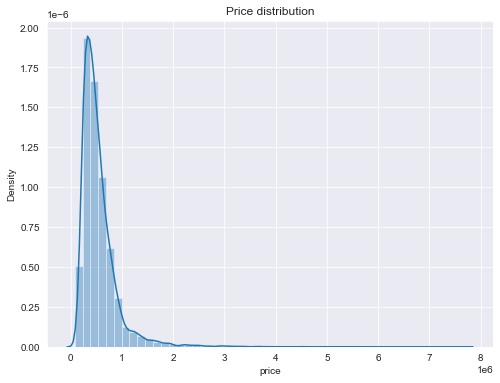

In [30]:
#plot the distribution of price.
sns.set_style('darkgrid')
plt.figure(figsize=(8,6))
dist=sns.distplot(king_county_df["price"])
dist.set_title("Price distribution")


Text(0.5, 1.0, 'Normalized house prices distribution')

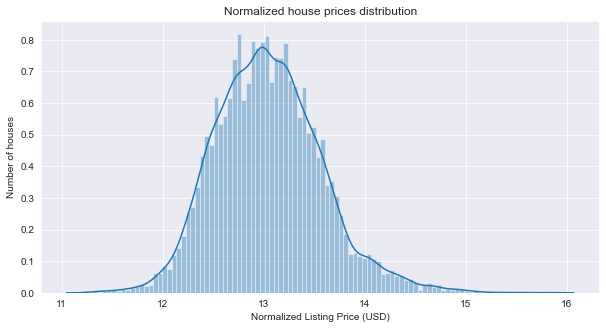

In [31]:
#Normalizing the data
fig, ax = plt.subplots(figsize=(10, 5))

sns.distplot(np.log(king_county_df['price']), bins = 100) 

ax.set_xlabel("Normalized Listing Price (USD)")
ax.set_ylabel("Number of houses")
ax.set_title("Normalized house prices distribution")

#### Distribution of all categorical variables

In [32]:
# assign categorical variables to a variable called categorical_feature
categorical_feature = [king_county_df['bedrooms'], king_county_df['view'],
                       king_county_df['floors'], king_county_df['grade'],
                       king_county_df['condition'],king_county_df['renovated']]

In [33]:
enumerate(categorical_feature)

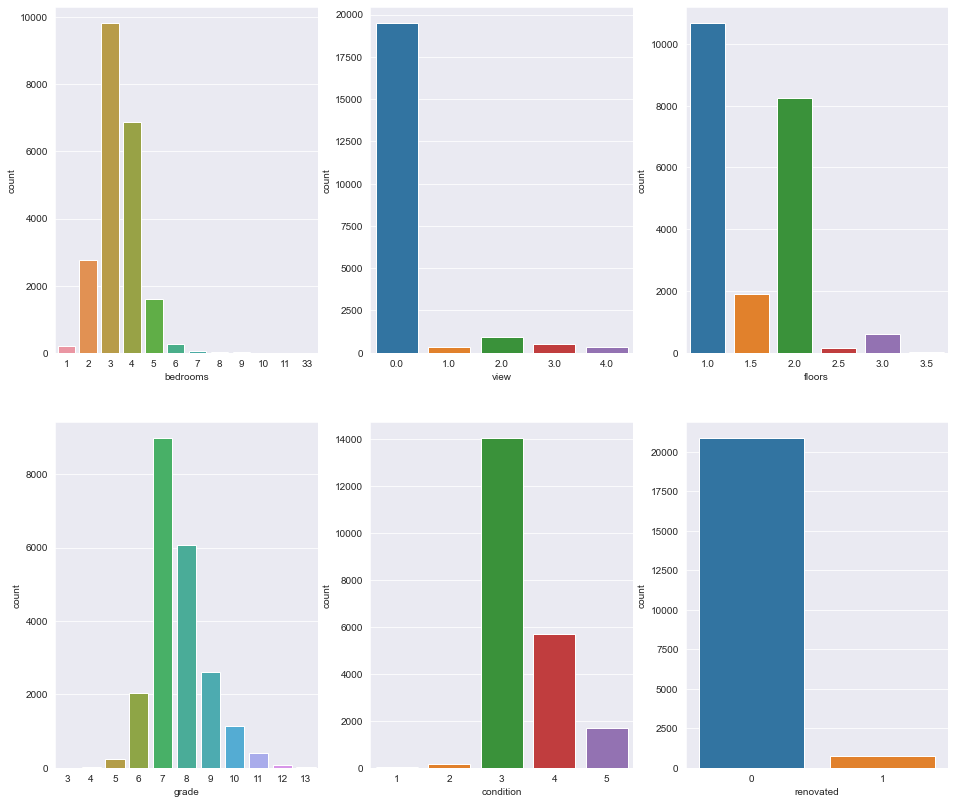

In [34]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,14))
for i in enumerate(categorical_feature):
    plt.subplot(2,3,i[0]+1)
    sns.countplot(i[1])

#### Distribution of all numerical variables

In [35]:
# assign categorical variables to a variable called categorical_feature
numerical_feature = [king_county_df['price'], king_county_df['sqft_living'],
                     king_county_df['sqft_lot'], king_county_df['sqft_above'],
                     king_county_df['sqft_basement']]

In [36]:
enumerate(numerical_feature)

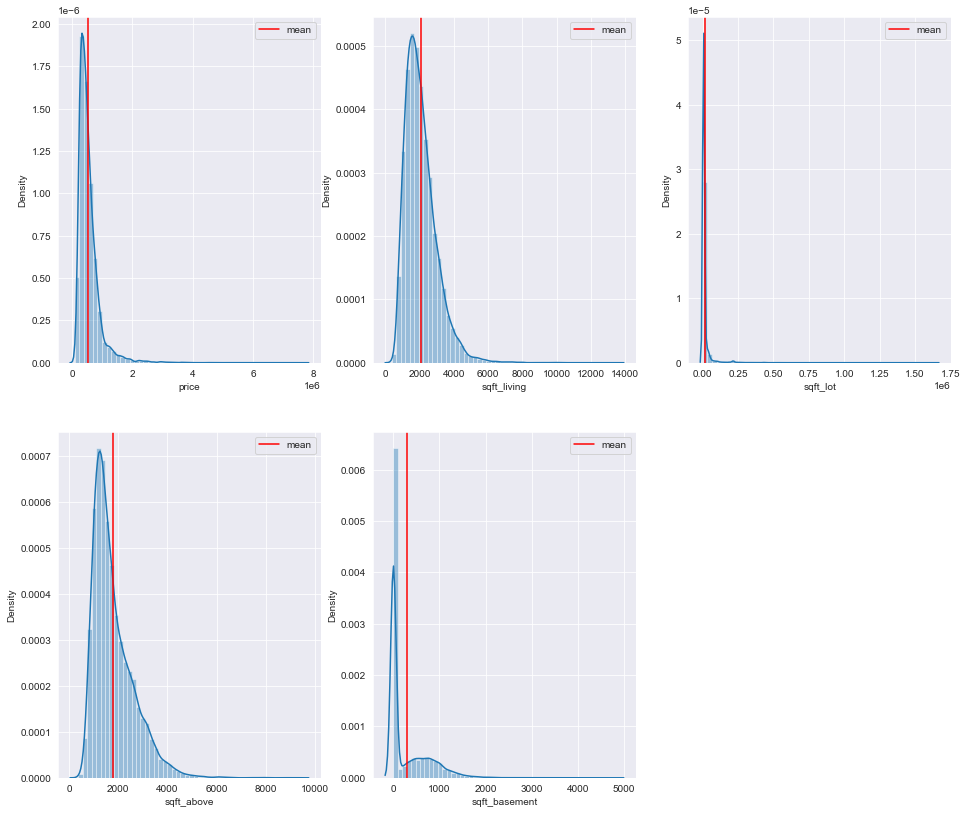

In [37]:
sns.set_style('darkgrid')


plt.figure(figsize=(16,14))
for i in enumerate(numerical_feature):
    plt.subplot(2,3,i[0]+1)
    sns.distplot(i[1])
    plt.axvline(x=i[1].mean(), color='red', label='mean')
    plt.legend()


### 4.4: BIVARIATE ANALYSIS

Bivariate analysis is an analysis of two variables to determine the relationships between them.

#### Relationships between price and categorical variables

In [38]:
# assign categorical variables to a variable called categorical_feature
categorical_feature = [king_county_df['bedrooms'], king_county_df['view'],
                       king_county_df['floors'], king_county_df['grade'],
                       king_county_df['condition'],king_county_df['renovated']]

In [39]:
enumerate(categorical_feature)

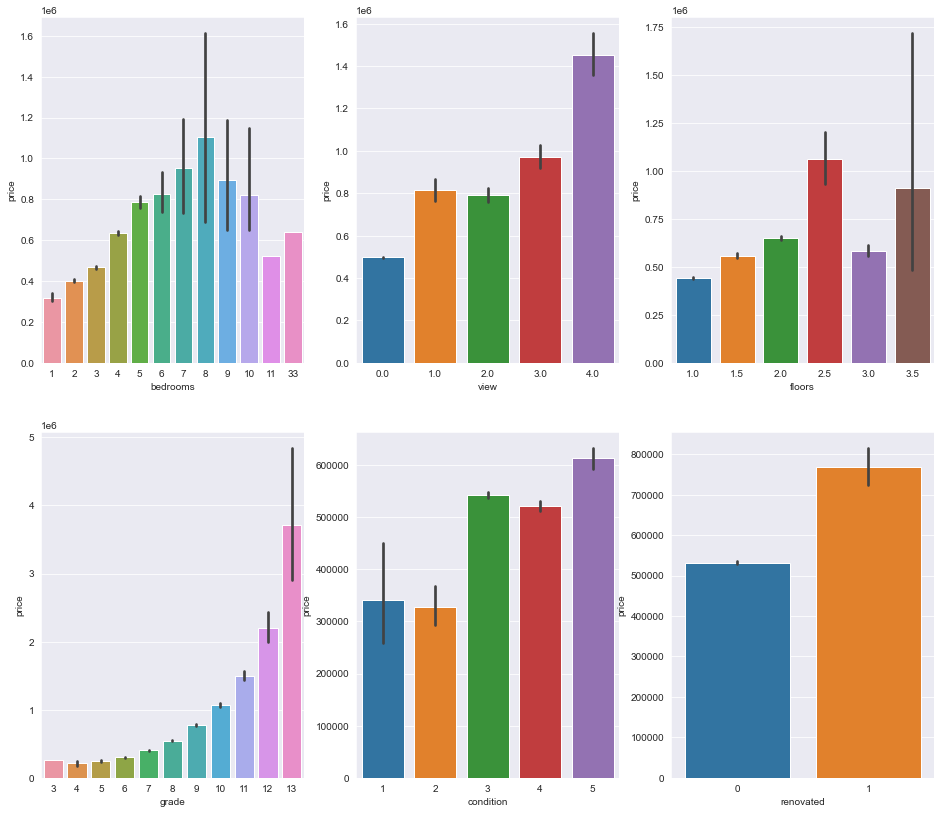

In [40]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,14))
for i in enumerate(categorical_feature):
    plt.subplot(2,3,i[0]+1)
    sns.barplot(x=i[1],y=king_county_df['price'])

The condition of the houses are done using the [kc_county_data](https://kingcounty.gov/depts/assessor/Reports/area-reports/2016/~/media/depts/Assessor/documents/AreaReports/2016/Residential/034.ashx) on page 6 of the document.<br>
The condition of the houses are as follows:<br>
`1` = Poor Many repairs needed. Showing serious deterioration.<br>
`2` = Fair Some repairs needed immediately. Much deferred maintenance.<br>
`3` = Average Depending upon age of improvement; normal amount of upkeep for the age
of the home.<br>
`4` = Good Condition above the norm for the age of the home. Indicates extra attention
and care has been taken to maintain.<br>
`5` = Very Good Excellent maintenance and updating on home. Not a total renovation.<br>


The grade of the houses are done using the [kc_county_data](https://kingcounty.gov/depts/assessor/Reports/area-reports/2016/~/media/depts/Assessor/documents/AreaReports/2016/Residential/034.ashx) on page 6 of the document.<br>
The grade of the houses are as follows:<br>

`Grades 1` - 3 Falls short of minimum building standards. Normally cabin or inferior structure.<br>
`Grade 4` - Generally older low quality construction. Does not meet code.<br>
`Grade 5` - Lower construction costs and workmanship. Small, simple design.<br>
`Grade 6`  -Lowest grade currently meeting building codes. Low quality materials, simple designs.<br>
`Grade 7`  -Average grade of construction and design. Commonly seen in plats and older subdivisions.<br>
`Grade 8`  -Just above average in construction and design. Usually better materials in both the exterior and   interior finishes.<br>
`Grade 9` -Better architectural design, with extra exterior and interior design and quality.<br>
`Grade 10` -Homes of this quality generally have high quality features. Finish work is better,
           and more design quality is seen in the floor plans and larger square footage.<br>
`Grade 11` -Custom design and higher quality finish work, with added amenities of solid
           woods, bathroom fixtures and more luxurious options.<br>
`Grade 12` -Custom design and excellent builders. All materials are of the highest quality
           and all conveniences are present.<br>
`Grade 13` -Generally custom designed and built. Approaching the Mansion level. Large
            amount of highest quality cabinet work, wood trim and marble; large entries.<br>

#### Relationship between price and continuous variables

In [41]:
continuous_feature = [king_county_df['sqft_living'], king_county_df['sqft_lot'], 
                      king_county_df['sqft_above'],king_county_df['sqft_basement']]

In [42]:
enumerate(continuous_feature)

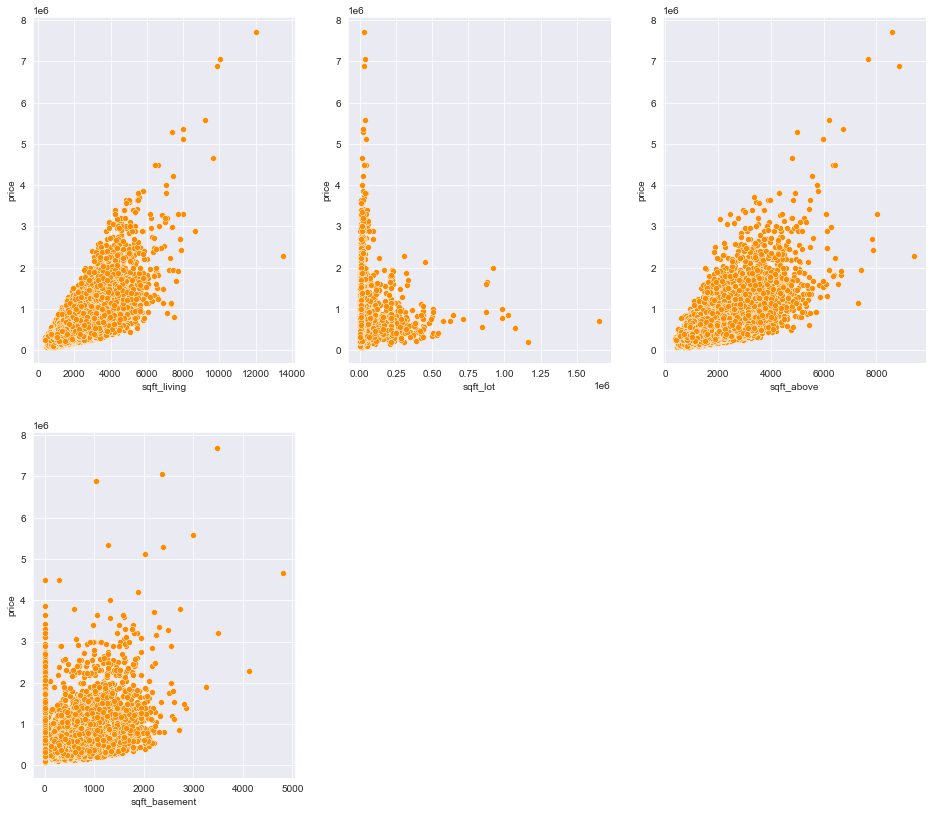

In [43]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,14))
for i in enumerate(continuous_feature):
    plt.subplot(2,3,i[0]+1)
    sns.scatterplot(i[1],king_county_df['price'],color='darkorange')

#### Distribution of house prices overtime

In [44]:
timeseries_feature = [king_county_df['yr_built'],king_county_df['month_sold'], 
                      king_county_df['year']]

In [45]:
enumerate(timeseries_feature)

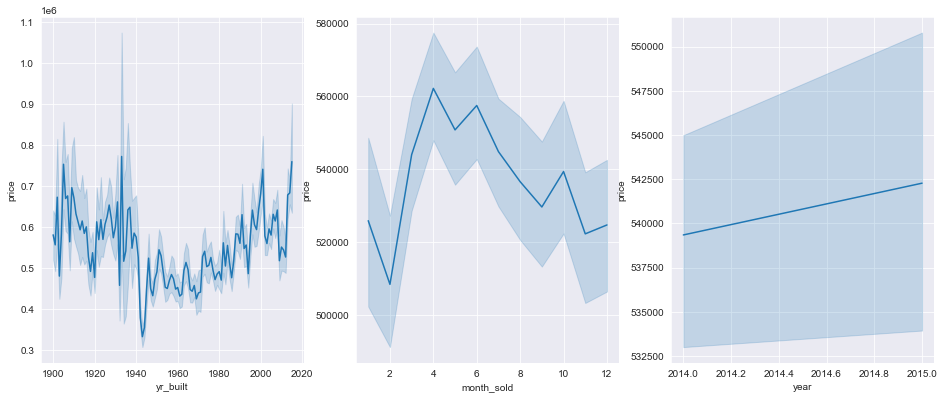

In [46]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,14))
for i in enumerate(timeseries_feature):
    plt.subplot(2,3,i[0]+1)
    sns.lineplot(i[1],king_county_df['price'])

<AxesSubplot:xlabel='month_sold', ylabel='count'>

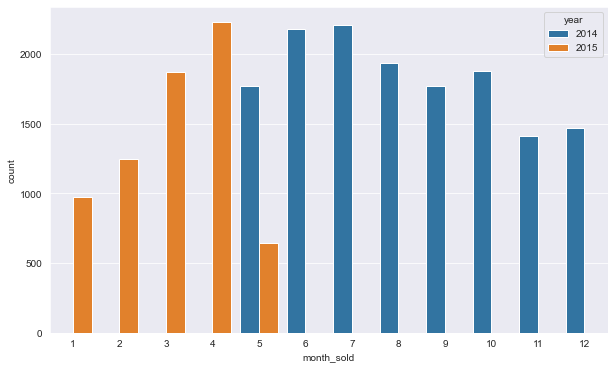

In [47]:
#more analysis on year and months
#check which month and year the houses sold the most
plt.figure(figsize=(10,6))
data = king_county_df[['month_sold', 'year']]
sns.countplot(king_county_df['month_sold'], hue = "year",data = data)

### 4.5: check for Outliers

In [48]:
all_columns = [king_county_df['bedrooms'],king_county_df['bathrooms'], 
               king_county_df['sqft_living'],king_county_df['sqft_lot'],
               king_county_df['floors'],king_county_df['waterfront'],
               king_county_df['view'],king_county_df['condition'],
               king_county_df['sqft_above'],king_county_df['grade'],
               king_county_df['sqft_basement'],king_county_df['sqft_living15'],
               king_county_df['sqft_lot15'],king_county_df['price']]

In [49]:
enumerate(all_columns)

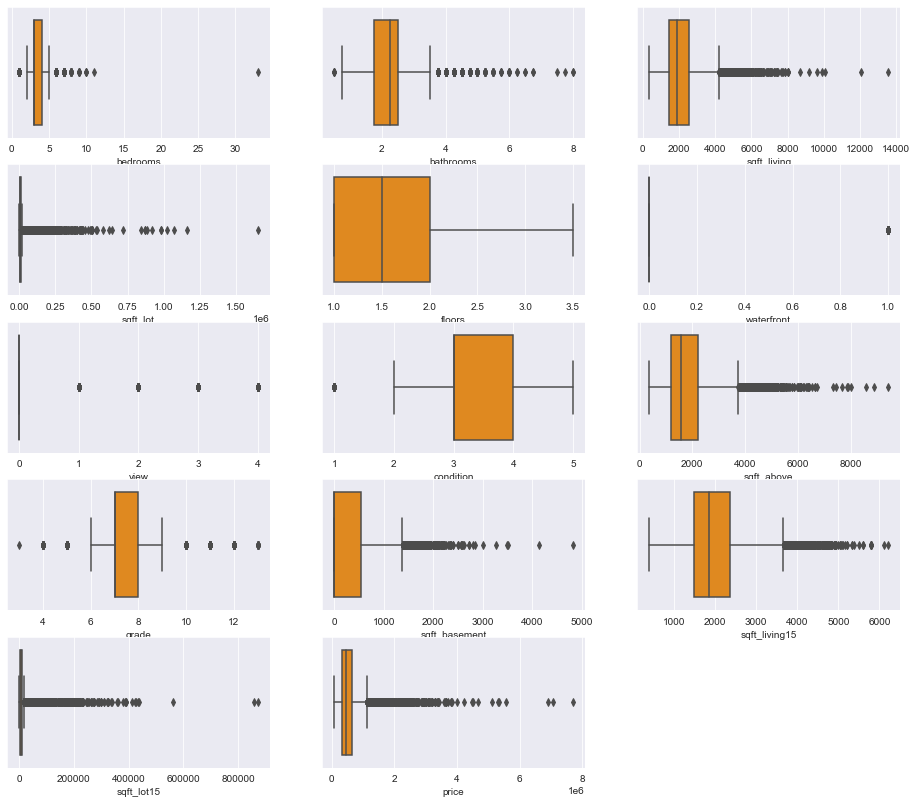

In [50]:
sns.set_style('darkgrid')

plt.figure(figsize=(16,14))
for i in enumerate(all_columns):
    plt.subplot(5,3,i[0]+1)
    sns.boxplot(i[1],color='darkorange')

## 5: Multicollinearity

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable can be used most effectively to predict or understand the dependent variable in a statistical model.

### 5.1 Using heatmap to  see correlation of each feature to house prices

In [51]:
#peasons correlation coefficients
king_county_df.corr().head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.003599,0.011772,-0.023803,...,-0.004359,0.021617,-0.010612,-0.001798,0.020672,-0.002701,-0.138557,0.009915,-0.011572,-0.010621
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,...,0.321108,0.053953,0.117855,0.306692,0.022036,0.585241,0.082845,0.003727,-0.009928,0.117543
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,...,0.297229,0.155670,0.017900,-0.009951,0.132054,0.393406,0.030690,-0.009949,-0.001046,0.017635
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,...,0.278485,0.507173,0.047177,0.024280,0.224903,0.569884,0.088303,-0.026577,0.007543,0.046742
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,...,0.428660,0.318152,0.051060,0.052155,0.241214,0.756402,0.184342,-0.029014,0.012112,0.050829


In [52]:
mask =np.zeros_like(king_county_df.corr())
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True

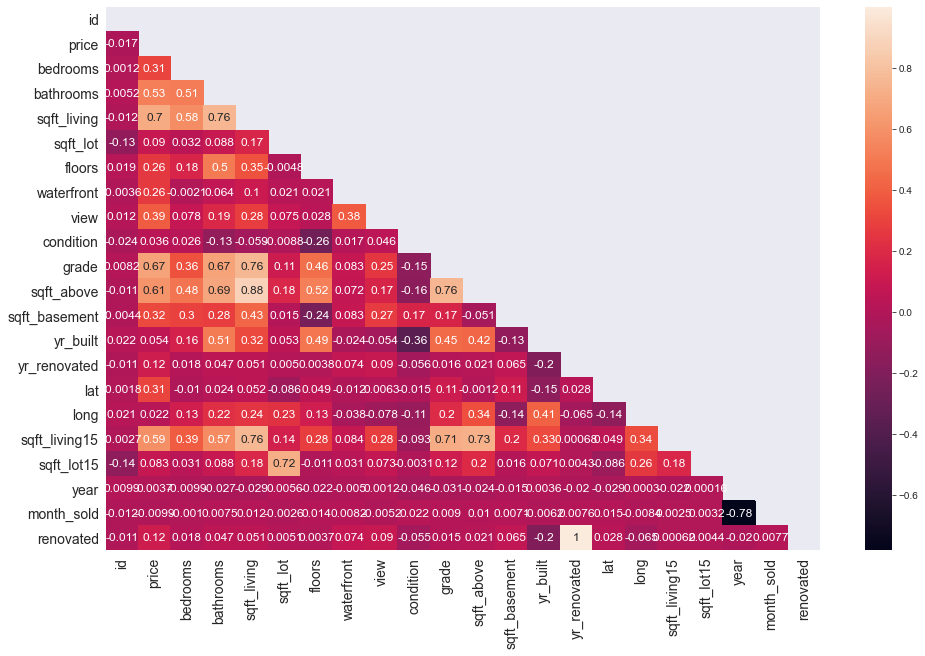

In [53]:
plt.figure(figsize=(16,10))
sns.heatmap(king_county_df.corr(), mask=mask, annot=True, annot_kws={"size":12})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

#### Degree of correlation:

• Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).

• High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.

• Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.

• Low degree: When the value lies below + .29, then it is said to be a small correlation.

• No correlation: When the value is zero.

In [54]:
#viewing correlation in a table 
correlation= king_county_df.corr()['price'].map(abs).sort_values(ascending = False)
pd.DataFrame(correlation)

,price
price,1.000000
sqft_living,0.701917
grade,0.667951
sqft_above,0.605368
sqft_living15,0.585241
bathrooms,0.525906
view,0.393497
sqft_basement,0.321108
bedrooms,0.308787
lat,0.306692


In [55]:
#checking which variables are highly correlated with our  price.
king_county_df.corr()[abs(king_county_df.corr()['price']) > 0.3]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,...,0.321108,0.053953,0.117855,0.306692,0.022036,0.585241,0.082845,0.003727,-0.009928,0.117543
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,...,0.297229,0.155670,0.017900,-0.009951,0.132054,0.393406,0.030690,-0.009949,-0.001046,0.017635
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,...,0.278485,0.507173,0.047177,0.024280,0.224903,0.569884,0.088303,-0.026577,0.007543,0.046742
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,...,0.428660,0.318152,0.051060,0.052155,0.241214,0.756402,0.184342,-0.029014,0.012112,0.050829
view,0.011772,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,...,0.270629,-0.054452,0.090339,0.006321,-0.077702,0.278928,0.073083,0.001239,-0.005161,0.090480
grade,0.008188,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,...,0.165843,0.447865,0.015623,0.113575,0.200341,0.713867,0.120981,-0.030635,0.008989,0.015259
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.166017,-0.158904,...,-0.051175,0.424037,0.020645,-0.001199,0.344842,0.731767,0.195077,-0.023782,0.010153,0.020566
sqft_basement,-0.004359,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,0.083050,0.270629,0.168482,...,1.000000,-0.130085,0.065008,0.109853,-0.142369,0.199288,0.015885,-0.014997,0.007090,0.064675
lat,-0.001798,0.306692,-0.009951,0.024280,0.052155,-0.085514,0.049239,-0.012157,0.006321,-0.015102,...,0.109853,-0.148370,0.027970,1.000000,-0.135371,0.048679,-0.086139,-0.029003,0.014995,0.027908
sqft_living15,-0.002701,0.585241,0.393406,0.569884,0.756402,0.144763,0.280102,0.083823,0.278928,-0.093072,...,0.199288,0.326377,0.000683,0.048679,0.335626,1.000000,0.183515,-0.021549,0.002513,0.000622


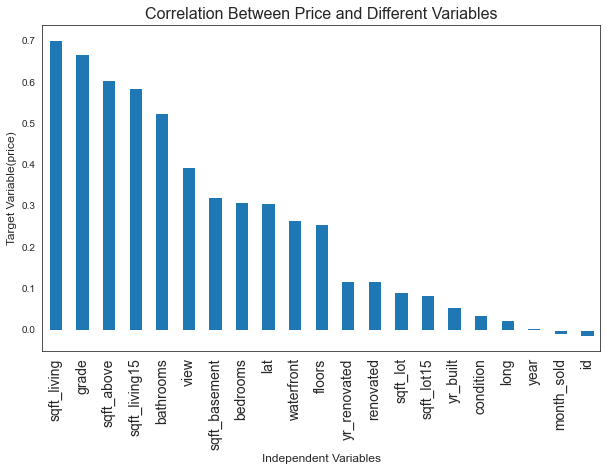

In [56]:
#Plot the Correlation table Between Price and Different Variables
ax=king_county_df.corr()['price'].sort_values(ascending=False).drop('price').plot(kind='bar',figsize=(10,6))

# Set title
ax.set_title("Correlation Between Price and Different Variables",fontdict={'fontsize':16})

# Set labels for X and Y axes
ax.set_xlabel("Independent Variables",fontdict={'fontsize':12})
ax.set_ylabel("Target Variable(price)",fontdict={'fontsize':12})

ax.set_xticklabels(ax.get_xticklabels(),fontsize=14);

### 5.2: checking for Multicollinearity between different independent variables

In [57]:
# find variables that have a greater correlation of more than 0.75 with each other
abs(king_county_df.corr()) > 0.70

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated
id,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [58]:
#checking if variables are correlated to each other
mc_df = king_county_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

mc_df['pairs'] = list(zip(mc_df.level_0, mc_df.level_1))

mc_df.set_index(['pairs'], inplace = True)

mc_df.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
mc_df.columns = ['cc']

mc_df.drop_duplicates(inplace=True)

mc_df[(mc_df.cc>.75) & (mc_df.cc<1)]

,cc
pairs,
"(yr_renovated, renovated)",0.999968
"(sqft_above, sqft_living)",0.876448
"(year, month_sold)",0.782325
"(grade, sqft_living)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(grade, sqft_above)",0.756073
"(sqft_living, bathrooms)",0.755758


High Correlation Coefficients Pairwise correlations among independent variables might be high (in absolute value). Rule of thumb: If the correlation > 0.8 then severe multicollinearity may be present.

##### From the table above i realized that sqft_living has high coreelation with bathrooms, grade, sqft_above and sqft_living15.Also i noticed grade has high correlation with sqft_living, sqft_above. From this observation i think i will drop both sqft_living and grade since they might cause problems of Multicollinearity to the model.

##### since id doesn't have any correlation with house prices we drop the column. I'm also going to drop the"zip code" column, I don't think i will need it for this project. even if I fed it to our model it would be considered as a continues value although it isn't. I am going to drop date column since we already split the date into month and year sold

##### Also i will have to drop yr_renovated, year, month sold

In [59]:
#check the columns we have
king_county_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month_sold',
       'renovated'],
      dtype='object')

In [60]:
king_county_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2014,10,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2015,2,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,2014,12,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2015,2,0


## Convert categorical data to numerical

In [61]:
def binary_convert(x):
    if x > 0:
        return 1
    else:
        return 0 
        
    return x

In [62]:
#Using the function binary convert
king_county_df['binary_view'] = king_county_df['view'].apply(binary_convert)
king_county_df['binary_view'].value_counts()

0    19485
1     2112
Name: binary_view, dtype: int64

In [63]:
king_county_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated,binary_view
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,0.0,98178,47.5112,-122.257,1340,5650,2014,10,0,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,1991.0,98125,47.7210,-122.319,1690,7639,2014,12,1,0
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,0.0,98028,47.7379,-122.233,2720,8062,2015,2,0,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,0.0,98136,47.5208,-122.393,1360,5000,2014,12,0,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,0.0,98074,47.6168,-122.045,1800,7503,2015,2,0,0


In [64]:
def binary_condition(x):
    if x < 2:
        return 0
    else:
        return 1 
        
    return x

In [65]:
king_county_df['binary_condition'] = king_county_df['condition'].apply(binary_condition)
king_county_df['binary_condition'].value_counts()

1    21568
0       29
Name: binary_condition, dtype: int64

In [66]:
def binary_floors(x):
    if x < 1.5:
        return 0
    else:
        return 1 
        
    return x

In [67]:
#Apply the function
king_county_df['bin_floors'] = king_county_df['floors'].apply(binary_floors)
king_county_df['bin_floors'].value_counts()

1    10924
0    10673
Name: bin_floors, dtype: int64

In [68]:
king_county_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,year,month_sold,renovated,binary_view,binary_condition,bin_floors
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,47.5112,-122.257,1340,5650,2014,10,0,0,1,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,47.7210,-122.319,1690,7639,2014,12,1,0,1,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,47.7379,-122.233,2720,8062,2015,2,0,0,1,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,47.5208,-122.393,1360,5000,2014,12,0,0,1,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,47.6168,-122.045,1800,7503,2015,2,0,0,1,0


In [69]:
# dropping id,zip code, and date columns
king_county_df.drop(["id", "zipcode","date", "sqft_living",'floors','view',
                     'condition',"grade", "year","yr_built", "yr_renovated",
                  "month_sold"], axis = 1, inplace = True)

In [70]:
king_county_df.head()

,price,bedrooms,bathrooms,sqft_lot,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,binary_view,binary_condition,bin_floors
0,221900.0,3,1.00,5650,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,538000.0,3,2.25,7242,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,180000.0,2,1.00,10000,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,604000.0,4,3.00,5000,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,510000.0,3,2.00,8080,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0


## Removing Outliers

In [71]:
def remove_outliers(data, col):
    #first and third quartile
    first_q, third_q = np.percentile(data[col], 25), np.percentile(data[col], 75)
    #interquartile range
    iq_range = third_q - first_q
    #get the cut_off for values(iqr*1.5)
    cut_off = iq_range * 1.5
    #lower and upper values
    lower_range, upper_range = first_q - cut_off, third_q + cut_off

    return data[(data[col] >= lower_range) & (data[col] <= upper_range)]

### Bedrooms

In [72]:
#bedroom outliers
clean_df = remove_outliers(king_county_df, 'bedrooms')
clean_df.bedrooms.value_counts()

3    9824
4    6882
2    2760
5    1601
Name: bedrooms, dtype: int64

In [73]:
#bathrooms
clean_df = remove_outliers(clean_df, 'bathrooms')
clean_df.bedrooms.value_counts()
    

3    9785
4    6650
2    2758
5    1413
Name: bedrooms, dtype: int64

In [74]:
#sqft_lot
clean_df = remove_outliers(clean_df, 'sqft_lot')
clean_df.bedrooms.value_counts()

3    8783
4    5767
2    2569
5    1228
Name: bedrooms, dtype: int64

In [75]:
#sqft_above
clean_df = remove_outliers(clean_df, 'sqft_above')
clean_df.bedrooms.value_counts()

3    8734
4    5465
2    2568
5    1115
Name: bedrooms, dtype: int64

In [76]:
#sqft_basement
clean_df = remove_outliers(clean_df, 'sqft_basement')
clean_df.bedrooms.value_counts()

3    8658
4    5299
2    2564
5    1002
Name: bedrooms, dtype: int64

In [77]:
#sqft_living15
clean_df = remove_outliers(clean_df, 'sqft_living15')
clean_df.bedrooms.value_counts()

3    8588
4    5152
2    2561
5     953
Name: bedrooms, dtype: int64

In [78]:
#sqft_lot15
clean_df = remove_outliers(clean_df, 'sqft_lot15')
clean_df.bedrooms.value_counts()

3    8336
4    5026
2    2515
5     925
Name: bedrooms, dtype: int64

In [79]:
#price
clean_df = remove_outliers(clean_df, 'price')
clean_df.bedrooms.value_counts()

3    8165
4    4777
2    2492
5     862
Name: bedrooms, dtype: int64

In [80]:
clean_df.shape

(16296, 15)

##  6: LINEAR REGRESSION MODELLING

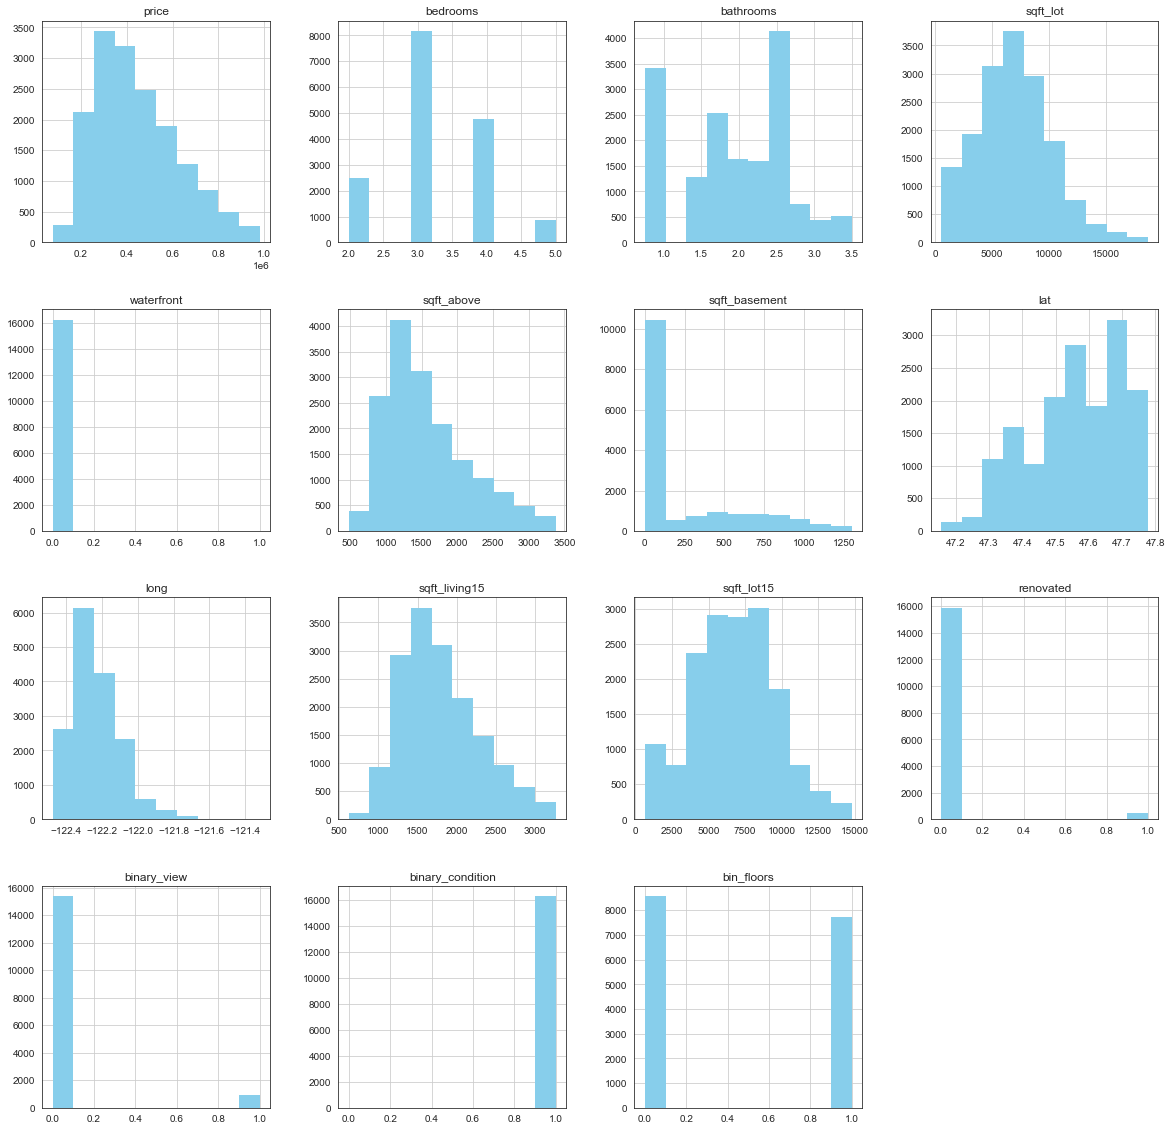

In [81]:
clean_df.hist(figsize = (20,20), color = "skyblue", lw=0); #this function gives us histograms for each column

### 6.1: Model 1 

##### Nomalized indipendent ariables and using all of the indipendent variables for prediction.

#### Normalization 

In [168]:
#creating and label features
x = clean_df.drop(columns=["price",'bedrooms','bathrooms','sqft_lot'])


In [169]:
y = clean_df["price"]
y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [170]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1)

In [171]:
print(f"X_train is a DataFrame with {x_train.shape[0]} rows and {x_train.shape[1]} columns")
print(f"y_train is a Series with {y_train.shape[0]} values")

# We always should have the same number of rows in X as values in y
assert x_train.shape[0] == y_train.shape[0]

X_train is a DataFrame with 12222 rows and 11 columns
y_train is a Series with 12222 values


In [172]:
# normalizing the data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)


#### Train the model

In [173]:
#training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x_train,y_train)

LinearRegression()

In [174]:
# display the intercept and coefficients of the OLS model
print("Intercept is" + str(OLS.intercept_))
print("the set of coefficients are" + str(OLS.coef_))
print("The R-squared values is" + str(OLS.score(x_train,y_train)))

Intercept is442939.5256095578
the set of coefficients are[  7007.31024894  68752.16491406  39008.63054716  84663.46308643
 -10556.89413429  38183.32155275 -21755.95063558  12897.56142813
  18611.57897293   3964.20012486   4168.23733714]
The R-squared values is0.578661008052517


In [175]:
#predicting price 
y_pred = OLS.predict(x_test)
performance = pd.DataFrame({'PREDICTIONS' : y_pred, 'ACTUAL VALUES':y_test})
performance['error'] = performance['ACTUAL VALUES'] - performance['PREDICTIONS']
performance


,PREDICTIONS,ACTUAL VALUES,error
8138,402299.393582,394000.0,-8299.393582
15491,504469.523846,700000.0,195530.476154
20451,661818.993613,870000.0,208181.006387
21179,420110.497760,445000.0,24889.502240
376,465656.695421,450000.0,-15656.695421
...,...,...,...
11671,503920.003532,500000.0,-3920.003532
13899,687132.261747,480000.0,-207132.261747
18020,646819.144646,585000.0,-61819.144646
6681,322604.849755,350000.0,27395.150245


In [176]:
# preparing the data for plotting
performance.reset_index(drop =True, inplace =True)
performance.reset_index( inplace =True)
performance.head()

,index,PREDICTIONS,ACTUAL VALUES,error
0,0,402299.393582,394000.0,-8299.393582
1,1,504469.523846,700000.0,195530.476154
2,2,661818.993613,870000.0,208181.006387
3,3,420110.497760,445000.0,24889.502240
4,4,465656.695421,450000.0,-15656.695421


In [177]:
performance['error'].abs().mean()

90571.12200332498

<function matplotlib.pyplot.show(close=None, block=None)>

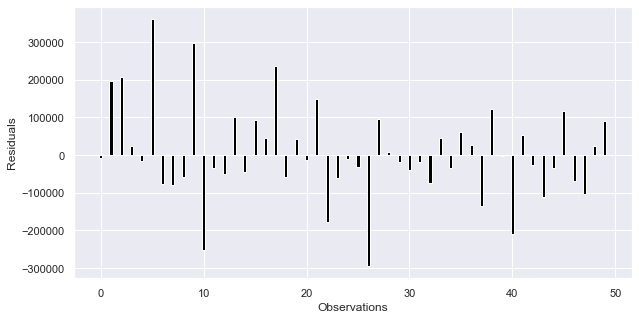

In [178]:
#plot the residuals
fig = plt.figure(figsize =(10,5))
plt.bar('index','error', data = performance[:50], color ='black', width=0.3)
plt.xlabel("Observations")
plt.ylabel('Residuals')
plt.show

In [179]:
# display the intercept and coefficients of the OLS model
import statsmodels.api as sm
x_train=sm.add_constant(x_train)
nicerOLS=sm.OLS(y_train, x_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     1524.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:49:20   Log-Likelihood:            -1.5996e+05
No. Observations:               12222   AIC:                         3.199e+05
Df Residuals:                   12210   BIC:                         3.200e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.429e+05   1057.690    418.780      0.000    4.41e+05    4.45e+05
x1          7007.3102   1066.625      6.570      0.000    4916.557    9098.064
x2          6.875e+04   1871.327     36.740      0.000    6.51e+04    7.24e+04
x3          3.901e+04   1207.233     32.312      0.000    3.66e+04    4.14e+04
x4          8.466e+04   1094.219     77.373      0.000    8.25e+04    8.68e+04
x5         -1.056e+04   1220.632     -8.649      0.000   -1.29e+04   -8164.262
x6          3.818e+04   1625.570     23.489      0.000     3.5e+04    4.14e+04
x7         -2.176e+04   1289.117    -16.877      0.000   -2.43e+04   -1.92e+04
x8           1.29e+04   1065.481     12.105      0.000    1.08e+04     1.5e+04
x9          1.861e+04   1102.407     16.883      0.000    1.65e+04    2.08e+04
x10         3964.2001   1058.545      3.745      0.000    1889.284    6039.117
x11         4168.2373   1533.222      2.719      0.007    1162.879    7173.596
==============================================================================
Omnibus:                      758.130   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1010.575
Skew:                           0.570   Prob(JB):                    3.60e-220
Kurtosis:                       3.827   Cond. No.                         3.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Actual vs predicted')

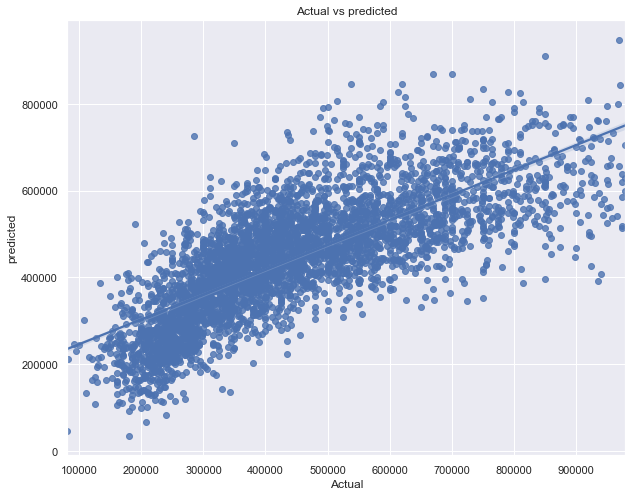

In [180]:
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.regplot(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted')

### Model 2

##### using both nomalized (target)price and independent variables. USED ALL VARIABLES

#### Normalization 

In [181]:
#creating and label features
x1 = clean_df.drop(columns=["price",'bedrooms','bathrooms','sqft_lot'])
x1.head()

,waterfront,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,renovated,binary_view,binary_condition,bin_floors
0,0.0,1180,0.0,47.5112,-122.257,1340,5650,0,0,1,0
1,0.0,2170,400.0,47.7210,-122.319,1690,7639,1,0,1,1
2,0.0,770,0.0,47.7379,-122.233,2720,8062,0,0,1,0
3,0.0,1050,910.0,47.5208,-122.393,1360,5000,0,0,1,0
4,0.0,1680,0.0,47.6168,-122.045,1800,7503,0,0,1,0


In [182]:
y1=np.log(clean_df.price)
y1.head()

0    12.309982
1    13.195614
2    12.100712
3    13.311329
4    13.142166
Name: price, dtype: float64

In [183]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, random_state = 1)

In [184]:
# normalizing the independent variables data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x1_train = sc.fit_transform(x1_train)
x1_test  = sc.transform(x1_test)


#### Train the model

In [185]:
#training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x1_train,y1_train)

LinearRegression()

In [186]:
# display the intercept and coefficients of the OLS model
print("Intercept is" + str(OLS.intercept_))
print("the set of coefficients are" + str(OLS.coef_))
print("The R-squared values is" + str(OLS.score(x1_train,y1_train)))

Intercept is12.917108697397953
the set of coefficients are[ 0.01497356  0.15056416  0.09226403  0.21759212 -0.01396838  0.09223806
 -0.05698474  0.02415049  0.03724501  0.01436396  0.01519004]
The R-squared values is0.6274659927605246


In [187]:
#predicting price 
y1_pred = OLS.predict(x1_test)
performance1 = pd.DataFrame({'PREDICTIONS' : y1_pred, 'ACTUAL VALUES':y1_test})
performance1['error'] = performance1['ACTUAL VALUES'] - performance1['PREDICTIONS']
performance1

,PREDICTIONS,ACTUAL VALUES,error
8138,12.857367,12.884106,0.026739
15491,13.056131,13.458836,0.402704
20451,13.443018,13.676248,0.233231
21179,12.903530,13.005830,0.102300
376,12.980163,13.017003,0.036840
...,...,...,...
11671,13.071649,13.122363,0.050714
13899,13.530583,13.081541,-0.449041
18020,13.395407,13.279367,-0.116040
6681,12.627553,12.765688,0.138135


In [188]:
# preparing the data for plotting
performance1.reset_index(drop =True, inplace =True)
performance1.reset_index( inplace =True)
performance1.head()

,index,PREDICTIONS,ACTUAL VALUES,error
0,0,12.857367,12.884106,0.026739
1,1,13.056131,13.458836,0.402704
2,2,13.443018,13.676248,0.233231
3,3,12.903530,13.005830,0.102300
4,4,12.980163,13.017003,0.036840


In [189]:
performance1['error'].abs().mean()

0.19936138987538518

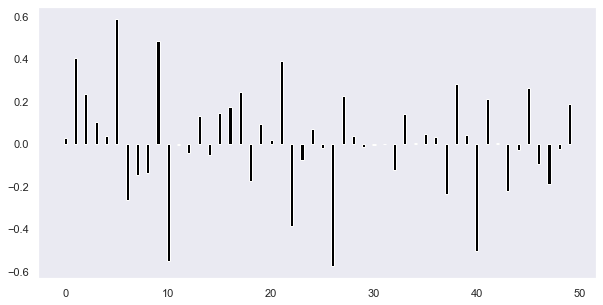

In [190]:
#plot the residuals
sns.set_style('dark')
fig = plt.figure(figsize =(10,5))
plt.bar('index','error', data = performance1[:50], color ='black', width=0.3)
plt.show()

In [191]:
# display the intercept and coefficients of the OLS model
import statsmodels.api as sm
x1_train=sm.add_constant(x1_train)
nicerOLS=sm.OLS(y1_train, x1_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.627
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     1870.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:55:46   Log-Likelihood:                -630.70
No. Observations:               12222   AIC:                             1285.
Df Residuals:                   12210   BIC:                             1374.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9171      0.002   5602.079      0.000      12.913      12.922
x1             0.0150      0.002      6.440      0.000       0.010       0.020
x2             0.1506      0.004     36.907      0.000       0.143       0.159
x3             0.0923      0.003     35.058      0.000       0.087       0.097
x4             0.2176      0.002     91.218      0.000       0.213       0.222
x5            -0.0140      0.003     -5.249      0.000      -0.019      -0.009
x6             0.0922      0.004     26.028      0.000       0.085       0.099
x7            -0.0570      0.003    -20.277      0.000      -0.062      -0.051
x8             0.0242      0.002     10.397      0.000       0.020       0.029
x9             0.0372      0.002     15.498      0.000       0.033       0.042
x10            0.0144      0.002      6.225      0.000       0.010       0.019
x11            0.0152      0.003      4.545      0.000       0.009       0.022
==============================================================================
Omnibus:                      159.567   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.240
Skew:                          -0.167   Prob(JB):                     3.34e-49
Kurtosis:                       3.571   Cond. No.                         3.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Actual vs predicted model 2')

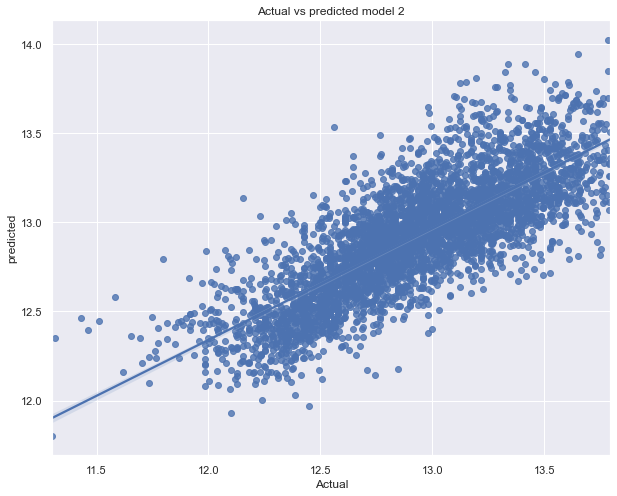

In [192]:
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.regplot(y1_test,y1_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted model 2')

### Model 3

In [107]:
x3= clean_df.loc[: ,['sqft_lot','sqft_above',"sqft_basement",'sqft_living15','sqft_lot15']]
x3

,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
0,5650,1180,0.0,1340,5650
1,7242,2170,400.0,1690,7639
2,10000,770,0.0,2720,8062
3,5000,1050,910.0,1360,5000
4,8080,1680,0.0,1800,7503
...,...,...,...,...,...
21592,1131,1530,0.0,1530,1509
21593,5813,2310,0.0,1830,7200
21594,1350,1020,0.0,1020,2007
21595,2388,1600,0.0,1410,1287


In [108]:
y3 = clean_df["price"]
y3

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 16296, dtype: float64

In [109]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, random_state = 1)

In [110]:
# normalizing the independent variables data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x3_train = sc.fit_transform(x3_train)
x3_test  = sc.transform(x3_test)


#### Train model

In [111]:
#training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x3_train,y3_train)

LinearRegression()

In [112]:
# display the intercept and coefficients of the OLS model
print("Intercept is" + str(OLS.intercept_))
print("the set of coefficients are" + str(OLS.coef_))
print("The R-squared values is" + str(OLS.score(x3_train,y3_train)))

Intercept is442939.5256095565
the set of coefficients are[-13126.70647475  60013.05517317  52908.42227961  45486.58660144
 -28603.84021449]
The R-squared values is0.33905458402489663


In [113]:
#predicting price 
y3_pred = OLS.predict(x3_test)
performance3 = pd.DataFrame({'PREDICTIONS' : y3_pred, 'ACTUAL VALUES':y3_test})
performance3['error'] = performance3['ACTUAL VALUES'] - performance3['PREDICTIONS']
performance3

,PREDICTIONS,ACTUAL VALUES,error
8138,471225.564024,394000.0,-77225.564024
15491,452252.627490,700000.0,247747.372510
20451,606177.309314,870000.0,263822.690686
21179,483966.734862,445000.0,-38966.734862
376,352815.508551,450000.0,97184.491449
...,...,...,...
11671,536613.987924,500000.0,-36613.987924
13899,570085.026059,480000.0,-90085.026059
18020,505659.708124,585000.0,79340.291876
6681,422583.519371,350000.0,-72583.519371


In [114]:
performance3['error'].abs().mean()

119748.75601170702

In [115]:
# display the intercept and coefficients of the OLS model
import statsmodels.api as sm
x3_train=sm.add_constant(x3_train)
nicerOLS=sm.OLS(y3_train, x3_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.339
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     1253.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        08:49:04   Log-Likelihood:            -1.6271e+05
No. Observations:               12222   AIC:                         3.254e+05
Df Residuals:                   12216   BIC:                         3.255e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.429e+05   1324.399    334.446      0.000     4.4e+05    4.46e+05
x1         -1.313e+04   2697.010     -4.867      0.000   -1.84e+04   -7840.141
x2          6.001e+04   2004.217     29.943      0.000    5.61e+04    6.39e+04
x3          5.291e+04   1457.696     36.296      0.000    5.01e+04    5.58e+04
x4          4.549e+04   1980.766     22.964      0.000    4.16e+04    4.94e+04
x5          -2.86e+04   2710.891    -10.551      0.000   -3.39e+04   -2.33e+04
==============================================================================
Omnibus:                      433.688   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              481.022
Skew:                           0.486   Prob(JB):                    3.53e-105
Kurtosis:                       3.024   Cond. No.                         4.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Actual vs predicted model 3')

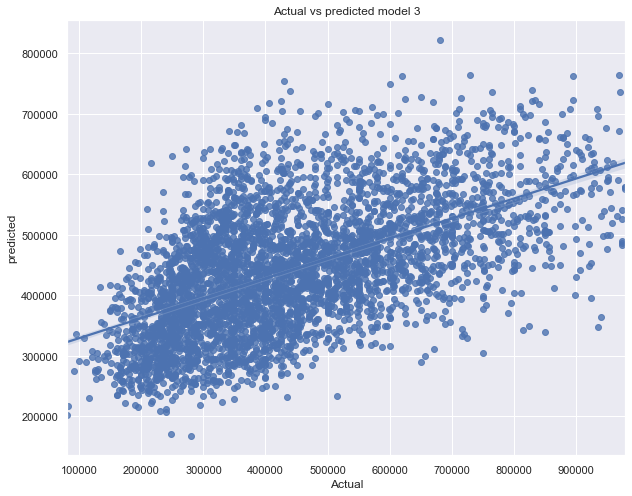

In [116]:
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.regplot(y3_test,y3_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted model 3')

In [117]:
clean_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'binary_view', 'binary_condition',
       'bin_floors'],
      dtype='object')

### Model 4

##### consider all variable above 0.3 correlation with price

In [118]:
x4 = clean_df.loc[:,['sqft_above','sqft_basement','sqft_living15','bathrooms','binary_view','bedrooms']]
y4 = clean_df["price"]

In [119]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4, random_state = 1)

In [120]:
# normalizing the independent variables data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x4_train = sc.fit_transform(x4_train)
x4_test  = sc.transform(x4_test)


#### Train model

In [121]:
#training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x4_train,y4_train)

LinearRegression()

In [122]:
# display the intercept and coefficients of the OLS model
print("Intercept is" + str(OLS.intercept_))
print("the set of coefficients are" + str(OLS.coef_))
print("The R-squared values is" + str(OLS.score(x4_train,y4_train)))

Intercept is442939.5256095565
the set of coefficients are[ 72583.61941338  54567.66845791  29828.97606225   4640.53328037
  20482.46618346 -20026.36536719]
The R-squared values is0.3124896727119524


In [123]:
#predicting price 
y4_pred = OLS.predict(x4_test)
performance4 = pd.DataFrame({'PREDICTIONS' : y4_pred, 'ACTUAL VALUES':y4_test})
performance4['error'] = performance4['ACTUAL VALUES'] - performance4['PREDICTIONS']
performance4

,PREDICTIONS,ACTUAL VALUES,error
8138,448132.696386,394000.0,-54132.696386
15491,419102.112276,700000.0,280897.887724
20451,560376.086925,870000.0,309623.913075
21179,423232.018488,445000.0,21767.981512
376,430309.898241,450000.0,19690.101759
...,...,...,...
11671,530921.722788,500000.0,-30921.722788
13899,528624.163842,480000.0,-48624.163842
18020,551861.829617,585000.0,33138.170383
6681,450718.056231,350000.0,-100718.056231


In [124]:
performance4['error'].abs().mean()

122042.74460081532

In [125]:
# display the intercept and coefficients of the OLS model
import statsmodels.api as sm
x4_train=sm.add_constant(x4_train)
nicerOLS=sm.OLS(y4_train, x4_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     925.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        08:49:08   Log-Likelihood:            -1.6295e+05
No. Observations:               12222   AIC:                         3.259e+05
Df Residuals:                   12215   BIC:                         3.260e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.429e+05   1350.807    327.907      0.000     4.4e+05    4.46e+05
x1          7.258e+04   2546.265     28.506      0.000    6.76e+04    7.76e+04
x2          5.457e+04   1736.291     31.428      0.000    5.12e+04     5.8e+04
x3          2.983e+04   2004.372     14.882      0.000    2.59e+04    3.38e+04
x4          4640.5333   1846.339      2.513      0.012    1021.416    8259.651
x5          2.048e+04   1388.569     14.751      0.000    1.78e+04    2.32e+04
x6         -2.003e+04   1701.733    -11.768      0.000   -2.34e+04   -1.67e+04
==============================================================================
Omnibus:                      494.390   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              556.495
Skew:                           0.523   Prob(JB):                    1.44e-121
Kurtosis:                       2.993   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Actual vs predicted model 4')

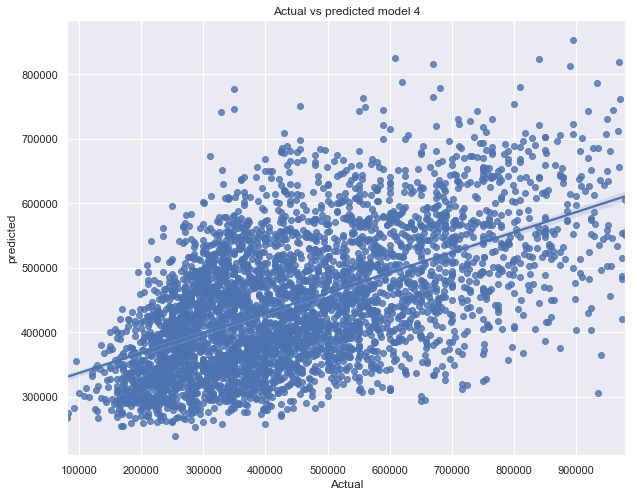

In [126]:
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.regplot(y4_test,y4_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted model 4')

### Model 5

In [142]:
clean_df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'waterfront',
       'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15',
       'sqft_lot15', 'renovated', 'binary_view', 'binary_condition',
       'bin_floors'],
      dtype='object')

In [152]:
x5 = clean_df.drop(columns=['renovated',"price",'bedrooms','bathrooms','sqft_lot'])
y5 = clean_df["price"]

In [153]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split
x5_train, x5_test, y5_train, y5_test = train_test_split(x5,y5, random_state = 1)

In [154]:
# normalizing the independent variables data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x5_train = sc.fit_transform(x5_train)
x5_test  = sc.transform(x5_test)

In [155]:
#training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x5_train,y5_train)

LinearRegression()

In [156]:
# display the intercept and coefficients of the OLS model
print("Intercept is" + str(OLS.intercept_))
print("the set of coefficients are" + str(OLS.coef_))
print("The R-squared values is" + str(OLS.score(x5_train,y5_train)))

Intercept is442939.5256095578
the set of coefficients are[  7607.59166903  69665.52774017  39791.51818934  84951.06928788
 -11157.78011232  36914.68715608 -21554.81374473  19156.65731517
   4014.36850714   4541.76726508]
The R-squared values is0.5736046248330218


In [157]:
#predicting price 
y5_pred = OLS.predict(x5_test)
performance5 = pd.DataFrame({'PREDICTIONS' : y5_pred, 'ACTUAL VALUES':y5_test})
performance5['error'] = performance5['ACTUAL VALUES'] - performance5['PREDICTIONS']
performance5

,PREDICTIONS,ACTUAL VALUES,error
8138,402830.697976,394000.0,-8830.697976
15491,507284.436673,700000.0,192715.563327
20451,666792.849878,870000.0,203207.150122
21179,421900.789950,445000.0,23099.210050
376,468365.459426,450000.0,-18365.459426
...,...,...,...
11671,506545.153303,500000.0,-6545.153303
13899,688298.614154,480000.0,-208298.614154
18020,650857.213944,585000.0,-65857.213944
6681,323585.935826,350000.0,26414.064174


In [158]:
performance5['error'].abs().mean()

90860.18515098584

In [159]:
# display the intercept and coefficients of the OLS model
import statsmodels.api as sm
x5_train=sm.add_constant(x5_train)
nicerOLS=sm.OLS(y5_train, x5_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.573
Method:                 Least Squares   F-statistic:                     1643.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        09:46:01   Log-Likelihood:            -1.6003e+05
No. Observations:               12222   AIC:                         3.201e+05
Df Residuals:                   12211   BIC:                         3.202e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.429e+05   1063.974    416.307      0.000    4.41e+05    4.45e+05
x1          7607.5917   1071.802      7.098      0.000    5506.690    9708.493
x2          6.967e+04   1880.915     37.038      0.000     6.6e+04    7.34e+04
x3          3.979e+04   1212.661     32.813      0.000    3.74e+04    4.22e+04
x4          8.495e+04   1100.460     77.196      0.000    8.28e+04    8.71e+04
x5         -1.116e+04   1226.869     -9.095      0.000   -1.36e+04   -8752.923
x6          3.691e+04   1631.826     22.622      0.000    3.37e+04    4.01e+04
x7         -2.155e+04   1296.668    -16.623      0.000   -2.41e+04    -1.9e+04
x8          1.916e+04   1108.031     17.289      0.000     1.7e+04    2.13e+04
x9          4014.3685   1064.826      3.770      0.000    1927.140    6101.597
x10         4541.7673   1542.019      2.945      0.003    1519.165    7564.369
==============================================================================
Omnibus:                      812.584   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1092.690
Skew:                           0.596   Prob(JB):                    5.31e-238
Kurtosis:                       3.851   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Actual vs predicted model 5')

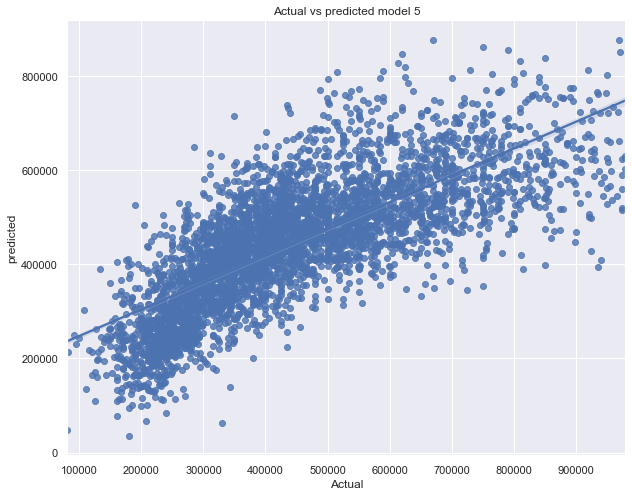

In [160]:
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.regplot(y5_test,y5_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted model 5')

### Model 6

In [196]:
x6 = clean_df.drop(columns=['renovated',"price",'bedrooms','bathrooms','sqft_lot'])
y6=np.log(clean_df.price)

In [197]:
# split the data into training and testing data
from sklearn.model_selection import train_test_split
x6_train, x6_test, y6_train, y6_test = train_test_split(x6,y6, random_state = 1)

In [198]:
# normalizing the independent variables data 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x6_train = sc.fit_transform(x6_train)
x6_test  = sc.transform(x6_test)

In [200]:
#training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x6_train,y6_train)

LinearRegression()

In [201]:
#training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x6_train,y6_train)

LinearRegression()

In [202]:
# display the intercept and coefficients of the OLS model
print("Intercept is" + str(OLS.intercept_))
print("the set of coefficients are" + str(OLS.coef_))
print("The R-squared values is" + str(OLS.score(x6_train,y6_train)))

Intercept is12.917108697397953
the set of coefficients are[ 0.01609758  0.15227442  0.09372998  0.21813065 -0.01509353  0.08986256
 -0.05660812  0.03826566  0.01445789  0.01588947]
The R-squared values is0.6241676478238392


In [203]:
#predicting price 
y6_pred = OLS.predict(x6_test)
performance6 = pd.DataFrame({'PREDICTIONS' : y6_pred, 'ACTUAL VALUES':y6_test})
performance6['error'] = performance6['ACTUAL VALUES'] - performance6['PREDICTIONS']
performance6

,PREDICTIONS,ACTUAL VALUES,error
8138,12.858362,12.884106,0.025744
15491,13.061402,13.458836,0.397433
20451,13.452331,13.676248,0.223917
21179,12.906882,13.005830,0.098947
376,12.985235,13.017003,0.031768
...,...,...,...
11671,13.076565,13.122363,0.045799
13899,13.532767,13.081541,-0.451225
18020,13.402968,13.279367,-0.123601
6681,12.629390,12.765688,0.136298


In [204]:
performance6['error'].abs().mean()

0.19975417315287974

In [205]:
# display the intercept and coefficients of the OLS model
import statsmodels.api as sm
x6_train=sm.add_constant(x6_train)
nicerOLS=sm.OLS(y6_train, x6_train).fit()
nicerOLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     2028.
Date:                Tue, 05 Jul 2022   Prob (F-statistic):               0.00
Time:                        10:10:28   Log-Likelihood:                -684.56
No. Observations:               12222   AIC:                             1391.
Df Residuals:                   12211   BIC:                             1473.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9171      0.002   5577.671      0.000      12.913      12.922
x1             0.0161      0.002      6.900      0.000       0.012       0.021
x2             0.1523      0.004     37.194      0.000       0.144       0.160
x3             0.0937      0.003     35.511      0.000       0.089       0.099
x4             0.2181      0.002     91.067      0.000       0.213       0.223
x5            -0.0151      0.003     -5.652      0.000      -0.020      -0.010
x6             0.0899      0.004     25.300      0.000       0.083       0.097
x7            -0.0566      0.003    -20.057      0.000      -0.062      -0.051
x8             0.0383      0.002     15.866      0.000       0.034       0.043
x9             0.0145      0.002      6.238      0.000       0.010       0.019
x10            0.0159      0.003      4.734      0.000       0.009       0.022
==============================================================================
Omnibus:                      142.052   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.299
Skew:                          -0.147   Prob(JB):                     3.20e-44
Kurtosis:                       3.554   Cond. No.                         3.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Actual vs predicted model 6')

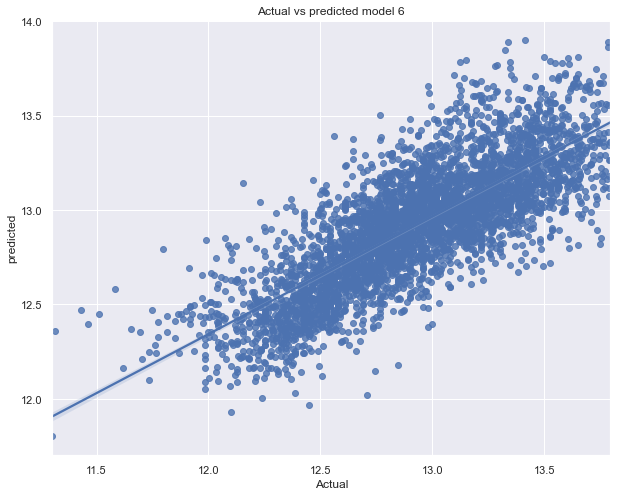

In [206]:
sns.set(rc={"figure.figsize":(10, 8)}) 
sns.regplot(y6_test,y6_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')
plt.title('Actual vs predicted model 6')